# Krystian Gronek & Katarzyna Piotrowska
# Text Mining and Social Media Mining, final project - Analyzing men and women comments using NLP methods

# Loading packages

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

from nltk.tokenize import word_tokenize # tokenization
nltk.download('punkt')
from nltk.corpus import stopwords # stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer # stemming
ps = PorterStemmer() 
from nltk.stem import WordNetLemmatizer # lemmization
lemmatizer = WordNetLemmatizer()

nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Krystian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Loading raw data and initial cleaning

In [2]:
men = pd.read_csv('data/askmen.csv', sep = ';')
women = pd.read_csv('data/askwomen.csv', sep = ';')

In [3]:
men

,username,comment_score,comment_text,submission_title,submission_ups,submission_downs
0,virusamongus,942,"Oh no, I was so interested in the nuanced deba...",BONK! Overly sexual questions are no longer al...,13949,0
1,CoffeeEnjoyerFrog,4172,"Can't wait to see : men, what gets you at 25% ...",BONK! Overly sexual questions are no longer al...,13949,0
2,5altyShoe,4326,Looks like someone got some post ~~nut~~ legum...,BONK! Overly sexual questions are no longer al...,13949,0
3,mightyjake,1876,> remember to read the Bible\n\nEzekiel 23:20\...,BONK! Overly sexual questions are no longer al...,13949,0
4,TallCombination6,764,How am I supposed to know that men enjoy blowj...,BONK! Overly sexual questions are no longer al...,13949,0
...,...,...,...,...,...,...
17275,randylahey2883,3,I had a bear come into my camp on more than on...,What is a fact or story you don't get to tell ...,9,0
17276,BalloonPilotDude,3,A story that I think about allot but I doubt t...,What is a fact or story you don't get to tell ...,9,0
17277,JetBrink,3,I'm awesome in bed,What is a fact or story you don't get to tell ...,9,0
17278,Stabbmaster,9,The first slaveowner in the United States was ...,What is a fact or story you don't get to tell ...,9,0


In [4]:
women

,username,comment_score,comment_text,submission_title,submission_ups,submission_downs
0,shockedpikachu123,28,Waiting for the cvs candy to be 75% off on Feb...,Valentines Day Mega thread! Check in here for ...,100,0
1,secrethedgehog5,16,"My second valentines day alone, and i am feeli...",Valentines Day Mega thread! Check in here for ...,100,0
2,KBXGazelle,15,February 14 was my mom's birthday so I usually...,Valentines Day Mega thread! Check in here for ...,100,0
3,meloaf,13,I'm sending all my friends Valentine's Day car...,Valentines Day Mega thread! Check in here for ...,100,0
4,OriginalOestrus,12,I have reservations at my favorite steakhouse!...,Valentines Day Mega thread! Check in here for ...,100,0
...,...,...,...,...,...,...
16851,CutWeary9135,1,12,What age do you consider to be “in your prime”?,373,0
16852,Irinakusx,1,20 it is advisable to take care of your health...,What age do you consider to be “in your prime”?,373,0
16853,NaN,1,[removed],What age do you consider to be “in your prime”?,373,0
16854,cuddliest_friend,1,If i feel that this is the Part of my Life whe...,What age do you consider to be “in your prime”?,373,0


In [5]:
print(men['submission_downs'].unique())
print(women['submission_downs'].unique())

[0]
[0]


We should delete 'submission_downs' column as it is only 0. It doesn't mean that reddit doesn't allow to scrape the number of downvotes (equivalent of dislikes on facebook) of a post but rather that people who are disinterested in topic just scroll through it and do not downvote it and when they are interested they obiously upvote (equivalent of likes on facebook) the submission post.

In [6]:
men = men.drop(columns = "submission_downs")
women = women.drop(columns = "submission_downs")

We need to check for comments removed by moderators. They can be seen in dataset as '[removed]' strings.

In [7]:
men['comment_text'].loc[men['comment_text'] == "[removed]"]
women['comment_text'].loc[women['comment_text'] == "[removed]"]

338      [removed]
720      [removed]
4943     [removed]
6676     [removed]
10034    [removed]
12665    [removed]
12872    [removed]
12904    [removed]
13351    [removed]
13394    [removed]
14807    [removed]
15123    [removed]
15593    [removed]
16142    [removed]
Name: comment_text, dtype: object

34       [removed]
47       [removed]
48       [removed]
49       [removed]
50       [removed]
           ...    
16841    [removed]
16842    [removed]
16845    [removed]
16853    [removed]
16855    [removed]
Name: comment_text, Length: 1277, dtype: object

We need to remove comments removed by moderators on reddit. What's important to note here is that in this sample (which was the 500 'hot' posts the day of scraping of data) there were as much as 1277 comments removed in /r/AskWomen subreddit while there were only 14 comments removed in /r/AskMen. This could mean multitude of things, for example strickter and more meticulous moderation on /r/AskWomen subreddit or bigger prevelance of reddit 'trolls' (user who malicously comment in order to induce negative emotions in other commenters) that needed to be banned.

In [8]:
# List of comments text that need to be removed
wrong_comments = ['[removed]']

# remove '[removed]' comments
men = men[men['comment_text'].isin(wrong_comments) == False]
women = women[women['comment_text'].isin(wrong_comments) == False]

# check if all '[removed]' comments were removed
women['comment_text'].loc[women['comment_text'] == "[removed]"]
men['comment_text'].loc[men['comment_text'] == "[removed]"]

Series([], Name: comment_text, dtype: object)

Series([], Name: comment_text, dtype: object)

It should also remove any comments for which the correspoding username is not a string (is a only number or there is no username given) 

In [9]:
# removing rows in men dataset with usernames that are not strings
men = men.loc[men.username.apply(lambda x: not isinstance(x, (float, int)))]

# removing rows in women dataset with usernames that are not strings
women = women.loc[women.username.apply(lambda x: not isinstance(x, (float, int)))]

It should also be checked weather the username contains 'bot' substring and delete such comments as they can be submitted by bots (created by other reddit users to auto submit comment responses to other users comments or posts), which we do not want. For that function ```check_if_bot(usernames)``` is constructed below along with the code needed to clean the data.

In [10]:
def check_if_bot(usernames):
    output = list()
    for i in usernames:
        if re.compile(r'bot').search(i.lower()):
            output.append(1)
        else:
            output.append(0)
    return output

In [11]:
# checking usernames and removing comments that have 'bot' keyword
men_usernames = men.drop(columns = ['comment_text', 'comment_score', 'submission_title', 'submission_ups'])["username"]
women_usernames = women.drop(columns = ['comment_text', 'comment_score', 'submission_title', 'submission_ups'])["username"]

men_usernames_checked = check_if_bot(men_usernames)
women_usernames_checked = check_if_bot(women_usernames)

men['usr_check'] = men_usernames_checked
women['usr_check'] = women_usernames_checked

# comments that are made by users with 'bot' substring in their name
men[['username', 'comment_text']].loc[men.usr_check == 1]
women[['username', 'comment_text']].loc[women.usr_check == 1]

# delete those comments
men = men[men.usr_check != 1]
women = women[women.usr_check != 1]

# drop check column
men = men.drop(columns = 'usr_check')
women = women.drop(columns = 'usr_check')

,username,comment_text
728,Sebbot,If you don’t have a dishwasher: 2 sets of ever...
2765,jimboTRON261,No matter ‘what happened next’ for everyone wh...
2840,CakeRobot365,She typically starts having sex with someone else
3269,plasticbots,Helicopter
4152,robothobbes,These posts are making me feel normal. Glad to...
4584,BigBottySlayer,I just got a gf... \nIf she get's bored of me...
5662,BigBottySlayer,Push them up from your thighs and stuff a part...
5676,weavebot,If you think you can do that and not get sucke...
5749,Cotterbot,Delete that shit. Don’t keep nudes of exes. Ha...
5781,MannyBothans_15,If you marry a woman who won't let you look at...


,username,comment_text
277,roboticvalkyrie,"Great question. Basically, any word topic whic..."
716,Both_Association_258,Loving myself again
1397,Bottle_Sweaty,"While the doctor was breaking my water, husban..."
1466,sarbot88,He didn’t say anything ridiculous but he could...
1594,Both_Association_258,"Sometimes I don't know, \nI have always been a..."
1720,Robotro17,Depend on the day. Somedays I feel cute. Somed...
2822,almafinklebottom,I'm scared work will stop and I won't be able ...
3700,Fariesinabottle,Puberty so I would finally have boobies. I hav...
4691,Trishbot,Pineapple does belong on pizza.
5481,sarbot88,"Black hair and fair skin, apparently that’s un..."


The comments written by users that had 'bot' in their name do not seem to be generated by a bots by just in case they are still removed. None of the non-desired comments are now present in datasets

# Text preprocessing using regular expressions and assembling final datasets

Below we can see the regular expression patterns that are needed for further data cleaning. Along with that there were written functions that perform such preprocessing techniques as lower casing, tokenization, stop word removal or stemming of the text data.

In [12]:
#DELETE_LINKS = re.compile("(([a-z]{3,6}://)|(^|\s))([a-zA-Z0-9\-]+\.)+[a-z]{2,13}[\.\?\=\&\%\/\w\-]*\b([^@]|$)")
DELETE_LINKS = re.compile(r"(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))")
DELETE_USER_MENTIONS = re.compile("u\/\w+")
DELETE_SUBREDDIT_MENTIONS = re.compile("(r/\w+|/r/\w+)")
REPLACE_NO_SPACE = re.compile("[.@;:!\'?,\"-/()\[\]<>~’]")
REPLACE_WITH_SPACE = re.compile("(\\n\\n)|(\\n)")
MULTIPLE_SPACES = re.compile("\s+")
LEADING_SPACES = re.compile("^\s+")
NUMBERS = re.compile("[0-9]+")
EMOJIS = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese characters
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"                 # dingbats
        u"\u3030"
        "]+", flags = re.UNICODE)
FINAL_CLEANING = re.compile('[^a-zA-Z0-9]')

In [13]:
# Preprocessing for sentiment analysis
def preprocess_text(text):
    text = [DELETE_LINKS.sub('', line) for line in text]
    text = [DELETE_USER_MENTIONS.sub('', line) for line in text]
    text = [DELETE_SUBREDDIT_MENTIONS.sub('', line) for line in text]
    text = [REPLACE_WITH_SPACE.sub(' ', line) for line in text]
    text = [REPLACE_NO_SPACE.sub('', line) for line in text]
    text = [NUMBERS.sub('', line) for line in text]
    text = [EMOJIS.sub('', line) for line in text]
    text = [line.lower() for line in text]
    text = [FINAL_CLEANING.sub(' ', line) for line in text]
    text = [MULTIPLE_SPACES.sub(' ', line) for line in text]
    text = [LEADING_SPACES.sub('', line) for line in text]
    return text

def tokenization(text):
    text_vectors = [word_tokenize(line) for line in text]
    return text_vectors

def stop_words_removal(text):
    text = [line.lower() for line in text] # makes text lower case
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [word for word in line if not word in stop_words]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

def custom_stop_words_removal(text, stop_words_list):
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [word for word in line if not word in stop_words_list]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

def stemming(text):
    tokenized = tokenization(text)
    filtered_sentences = list()
    for line in tokenized:
        filtered_line = [ps.stem(word) for word in line]
        filtered_sentences.append(filtered_line)
    text = [' '.join(line) for line in filtered_sentences]
    return text

################################################################################################################################
# lemmatization uses words existing in language
# maybe will delete this later
def lemmatization(text):
    return text

## Final "men" dataset

In [14]:
men.head(2)

,username,comment_score,comment_text,submission_title,submission_ups
0,virusamongus,942,"Oh no, I was so interested in the nuanced deba...",BONK! Overly sexual questions are no longer al...,13949
1,CoffeeEnjoyerFrog,4172,"Can't wait to see : men, what gets you at 25% ...",BONK! Overly sexual questions are no longer al...,13949


In [15]:
# men comments dataset cleaning
men_com = men.drop(columns = ['username', 'comment_score', 'submission_title', 'submission_ups'])["comment_text"]
men_com = preprocess_text(men_com)
men_stw = stop_words_removal(men_com)
men_tok = tokenization(men_com)
men_stm = stemming(men_stw) # with stop words (stw) removed
men_tok_stw = tokenization(stop_words_removal(men_com)) # with stop words (stw) removed

men_com

In [16]:
# Assembling men2 dataset
men2 = men[['username']].copy()
men2['com_original'] = men[['comment_text']].copy()
men2['cleaned'] = men_com
men2['cleaned_wo_sw'] = men_stw # comments with stop words removed
men2['tokenized'] = men_tok
men2['stemmed'] = men_stm
men2['tokenized_wo_sw'] = men_tok_stw

# Adding numerical variables
men2['comment_score'] = men['comment_score']
men2['submission_title'] = men['submission_title']
men2['submission_ups'] = men['submission_ups']

# adding remaining variables (submission post names and numerical variables)

# removing rows with empty cleaned comments
men2 = men2[men2.cleaned != '']

men2

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,comment_score,submission_title,submission_ups
0,virusamongus,"Oh no, I was so interested in the nuanced deba...",oh no i was so interested in the nuanced debat...,oh interested nuanced debate regarding guys en...,"[oh, no, i, was, so, interested, in, the, nuan...",oh interest nuanc debat regard guy enjoy frequ...,"[oh, interested, nuanced, debate, regarding, g...",942,BONK! Overly sexual questions are no longer al...,13949
1,CoffeeEnjoyerFrog,"Can't wait to see : men, what gets you at 25% ...",cant wait to see men what gets you at erection,cant wait see men gets erection,"[cant, wait, to, see, men, what, gets, you, at...",cant wait see men get erect,"[cant, wait, see, men, gets, erection]",4172,BONK! Overly sexual questions are no longer al...,13949
2,5altyShoe,Looks like someone got some post ~~nut~~ legum...,looks like someone got some post nut legume cl...,looks like someone got post nut legume clarity,"[looks, like, someone, got, some, post, nut, l...",look like someon got post nut legum clariti,"[looks, like, someone, got, post, nut, legume,...",4326,BONK! Overly sexual questions are no longer al...,13949
3,mightyjake,> remember to read the Bible\n\nEzekiel 23:20\...,remember to read the bible ezekiel there she l...,remember read bible ezekiel lusted lovers whos...,"[remember, to, read, the, bible, ezekiel, ther...",rememb read bibl ezekiel lust lover whose geni...,"[remember, read, bible, ezekiel, lusted, lover...",1876,BONK! Overly sexual questions are no longer al...,13949
4,TallCombination6,How am I supposed to know that men enjoy blowj...,how am i supposed to know that men enjoy blowj...,supposed know men enjoy blowjobs someone doesn...,"[how, am, i, supposed, to, know, that, men, en...",suppos know men enjoy blowjob someon doesnt as...,"[supposed, know, men, enjoy, blowjobs, someone...",764,BONK! Overly sexual questions are no longer al...,13949
...,...,...,...,...,...,...,...,...,...,...
17275,randylahey2883,I had a bear come into my camp on more than on...,i had a bear come into my camp on more than on...,bear come camp one occasion hiking yes food put,"[i, had, a, bear, come, into, my, camp, on, mo...",bear come camp one occas hike ye food put,"[bear, come, camp, one, occasion, hiking, yes,...",3,What is a fact or story you don't get to tell ...,9
17276,BalloonPilotDude,A story that I think about allot but I doubt t...,a story that i think about allot but i doubt t...,story think allot doubt others involved rememb...,"[a, story, that, i, think, about, allot, but, ...",stori think allot doubt other involv rememb tw...,"[story, think, allot, doubt, others, involved,...",3,What is a fact or story you don't get to tell ...,9
17277,JetBrink,I'm awesome in bed,im awesome in bed,im awesome bed,"[im, awesome, in, bed]",im awesom bed,"[im, awesome, bed]",3,What is a fact or story you don't get to tell ...,9
17278,Stabbmaster,The first slaveowner in the United States was ...,the first slaveowner in the united states was ...,first slaveowner united states black man felt ...,"[the, first, slaveowner, in, the, united, stat...",first slaveown unit state black man felt entit...,"[first, slaveowner, united, states, black, man...",9,What is a fact or story you don't get to tell ...,9


## Final Women dataset

In [17]:
women.head(2)

,username,comment_score,comment_text,submission_title,submission_ups
0,shockedpikachu123,28,Waiting for the cvs candy to be 75% off on Feb...,Valentines Day Mega thread! Check in here for ...,100
1,secrethedgehog5,16,"My second valentines day alone, and i am feeli...",Valentines Day Mega thread! Check in here for ...,100


In [18]:
# women comments
women_com = women.drop(columns = ['username', 'comment_score', 'submission_title', 'submission_ups'])["comment_text"]
women_com = preprocess_text(women_com)
women_stw = stop_words_removal(women_com)
women_tok = tokenization(women_com)
women_stm = stemming(women_stw) # with stop words (stw) removed
women_tok_stw = tokenization(stop_words_removal(women_com)) # with stop words (stw) removed

In [19]:
# Assembling women2 dataset
women2 = women[['username']].copy()
women2['com_original'] = women[['comment_text']].copy()
women2['cleaned'] = women_com
women2['cleaned_wo_sw'] = women_stw # comments with stop words removed
women2['tokenized'] = women_tok
women2['stemmed'] = women_stm
women2['tokenized_wo_sw'] = women_tok_stw

# Adding numerical variables
women2['comment_score'] = women['comment_score']
women2['submission_title'] = women['submission_title']
women2['submission_ups'] = women['submission_ups']

# removing rows with empty cleaned comments
women2 = women2[women2.cleaned != '']

women2

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,comment_score,submission_title,submission_ups
0,shockedpikachu123,Waiting for the cvs candy to be 75% off on Feb...,waiting for the cvs candy to be off on february,waiting cvs candy february,"[waiting, for, the, cvs, candy, to, be, off, o...",wait cv candi februari,"[waiting, cvs, candy, february]",28,Valentines Day Mega thread! Check in here for ...,100
1,secrethedgehog5,"My second valentines day alone, and i am feeli...",my second valentines day alone and i am feelin...,second valentines day alone feeling bit meh okay,"[my, second, valentines, day, alone, and, i, a...",second valentin day alon feel bit meh okay,"[second, valentines, day, alone, feeling, bit,...",16,Valentines Day Mega thread! Check in here for ...,100
2,KBXGazelle,February 14 was my mom's birthday so I usually...,february was my moms birthday so i usually spe...,february moms birthday usually spend day reall...,"[february, was, my, moms, birthday, so, i, usu...",februari mom birthday usual spend day realli e...,"[february, moms, birthday, usually, spend, day...",15,Valentines Day Mega thread! Check in here for ...,100
3,meloaf,I'm sending all my friends Valentine's Day car...,im sending all my friends valentines day cards...,im sending friends valentines day cards snail ...,"[im, sending, all, my, friends, valentines, da...",im send friend valentin day card snail mail wa...,"[im, sending, friends, valentines, day, cards,...",13,Valentines Day Mega thread! Check in here for ...,100
4,OriginalOestrus,I have reservations at my favorite steakhouse!...,i have reservations at my favorite steakhouse ...,reservations favorite steakhouse last year wor...,"[i, have, reservations, at, my, favorite, stea...",reserv favorit steakhous last year wore nice j...,"[reservations, favorite, steakhouse, last, yea...",12,Valentines Day Mega thread! Check in here for ...,100
...,...,...,...,...,...,...,...,...,...,...
16844,nocturnal_confidant,\nI understand the question. But I am going tr...,i understand the question but i am going try t...,understand question going try longer compare r...,"[i, understand, the, question, but, i, am, goi...",understand question go tri longer compar right...,"[understand, question, going, try, longer, com...",1,What age do you consider to be “in your prime”?,373
16849,D-Spornak,I'm hoping it's coming up soon.,im hoping its coming up soon,im hoping coming soon,"[im, hoping, its, coming, up, soon]",im hope come soon,"[im, hoping, coming, soon]",1,What age do you consider to be “in your prime”?,373
16850,Non-Priority-98,Hmmmm I would think that it is in stable times...,hmmmm i would think that it is in stable times...,hmmmm would think stable times short substanti...,"[hmmmm, i, would, think, that, it, is, in, sta...",hmmmm would think stabl time short substanti e...,"[hmmmm, would, think, stable, times, short, su...",1,What age do you consider to be “in your prime”?,373
16852,Irinakusx,20 it is advisable to take care of your health...,it is advisable to take care of your health at...,advisable take care health time always active ...,"[it, is, advisable, to, take, care, of, your, ...",advis take care health time alway activ desir,"[advisable, take, care, health, time, always, ...",1,What age do you consider to be “in your prime”?,373


In [20]:
women2 = women2[women2.cleaned != '']
women2

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,comment_score,submission_title,submission_ups
0,shockedpikachu123,Waiting for the cvs candy to be 75% off on Feb...,waiting for the cvs candy to be off on february,waiting cvs candy february,"[waiting, for, the, cvs, candy, to, be, off, o...",wait cv candi februari,"[waiting, cvs, candy, february]",28,Valentines Day Mega thread! Check in here for ...,100
1,secrethedgehog5,"My second valentines day alone, and i am feeli...",my second valentines day alone and i am feelin...,second valentines day alone feeling bit meh okay,"[my, second, valentines, day, alone, and, i, a...",second valentin day alon feel bit meh okay,"[second, valentines, day, alone, feeling, bit,...",16,Valentines Day Mega thread! Check in here for ...,100
2,KBXGazelle,February 14 was my mom's birthday so I usually...,february was my moms birthday so i usually spe...,february moms birthday usually spend day reall...,"[february, was, my, moms, birthday, so, i, usu...",februari mom birthday usual spend day realli e...,"[february, moms, birthday, usually, spend, day...",15,Valentines Day Mega thread! Check in here for ...,100
3,meloaf,I'm sending all my friends Valentine's Day car...,im sending all my friends valentines day cards...,im sending friends valentines day cards snail ...,"[im, sending, all, my, friends, valentines, da...",im send friend valentin day card snail mail wa...,"[im, sending, friends, valentines, day, cards,...",13,Valentines Day Mega thread! Check in here for ...,100
4,OriginalOestrus,I have reservations at my favorite steakhouse!...,i have reservations at my favorite steakhouse ...,reservations favorite steakhouse last year wor...,"[i, have, reservations, at, my, favorite, stea...",reserv favorit steakhous last year wore nice j...,"[reservations, favorite, steakhouse, last, yea...",12,Valentines Day Mega thread! Check in here for ...,100
...,...,...,...,...,...,...,...,...,...,...
16844,nocturnal_confidant,\nI understand the question. But I am going tr...,i understand the question but i am going try t...,understand question going try longer compare r...,"[i, understand, the, question, but, i, am, goi...",understand question go tri longer compar right...,"[understand, question, going, try, longer, com...",1,What age do you consider to be “in your prime”?,373
16849,D-Spornak,I'm hoping it's coming up soon.,im hoping its coming up soon,im hoping coming soon,"[im, hoping, its, coming, up, soon]",im hope come soon,"[im, hoping, coming, soon]",1,What age do you consider to be “in your prime”?,373
16850,Non-Priority-98,Hmmmm I would think that it is in stable times...,hmmmm i would think that it is in stable times...,hmmmm would think stable times short substanti...,"[hmmmm, i, would, think, that, it, is, in, sta...",hmmmm would think stabl time short substanti e...,"[hmmmm, would, think, stable, times, short, su...",1,What age do you consider to be “in your prime”?,373
16852,Irinakusx,20 it is advisable to take care of your health...,it is advisable to take care of your health at...,advisable take care health time always active ...,"[it, is, advisable, to, take, care, of, your, ...",advis take care health time alway activ desir,"[advisable, take, care, health, time, always, ...",1,What age do you consider to be “in your prime”?,373


# Simple distribution visualization of the 'comment_score' variable

Let's first look at the distribution of comment_score variable. We will look into numerical variables more in the next step of analysis.

Score (comment_score) variable is equal to the difference between upvotes and downvotes. It usually conveys information how useful information does the comment give to the reader or weather other users agree with the comment or disagree.

Below we can see summary statistics of these variables for men and women datasets

In [21]:
print("/r/AskMen summary statistics")
men.describe()
print("/r/AskWomen summary statistics")
women.describe()

/r/AskMen summary statistics


,comment_score,submission_ups
count,17135.000000,17135.000000
mean,17.610155,1592.738372
std,178.117615,2674.037195
min,-32.000000,0.000000
25%,1.000000,11.000000
50%,1.000000,340.000000
75%,3.000000,2893.000000
max,8059.000000,13949.000000


/r/AskWomen summary statistics


,comment_score,submission_ups
count,15473.000000,15473.000000
mean,13.530796,434.165320
std,108.434480,473.130126
min,-23.000000,0.000000
25%,1.000000,58.000000
50%,1.000000,206.000000
75%,3.000000,780.000000
max,4758.000000,1713.000000


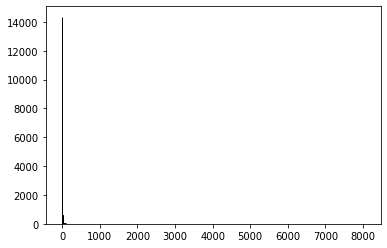

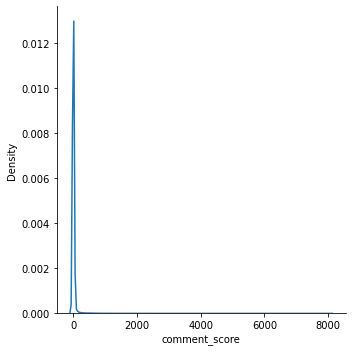

In [22]:
# /r/AskMen comment score histogram and density plots
plt.hist(men['comment_score'], color = 'blue', edgecolor = 'black', bins = 1000);
sns.displot(data = men, x = 'comment_score', kind = 'kde');

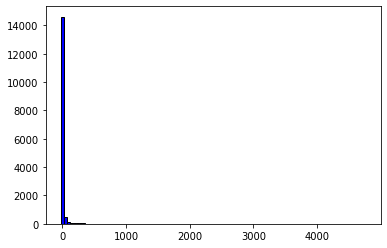

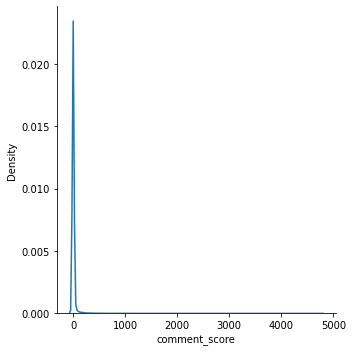

In [23]:
# /r/AskWomen comment score histogram and density plots
plt.hist(women['comment_score'], color = 'blue', edgecolor = 'black', bins = 100);
sns.displot(data = women, x = 'comment_score', kind = 'kde');

We could add to the whole series both for men and women dataset such values that we could log transform these datasets and try visualizing the data again.

In [24]:
men_min = np.min(men['comment_score'])
women_min = np.min(women['comment_score'])

men['comment_score2'] = men['comment_score'] + (np.abs(men_min) + 1)
women['comment_score2'] = women['comment_score'] + (np.abs(women_min) + 1)

men['log_cs'] = np.log(men['comment_score2'])
women['log_cs'] = np.log(women['comment_score2'])

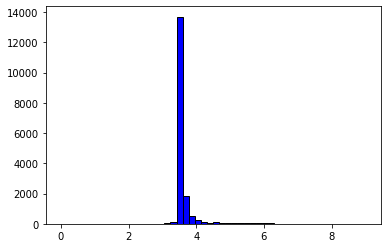

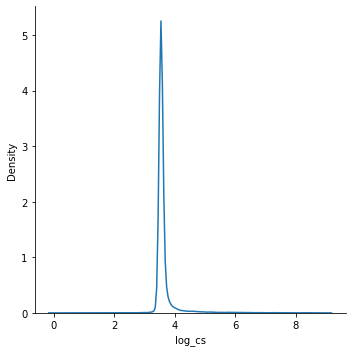

In [25]:
# /r/AskMen logarithm comment score histogram and density plots
plt.hist(men['log_cs'], color = 'blue', edgecolor = 'black', bins = 50);
sns.displot(data = men, x = 'log_cs', kind = 'kde');

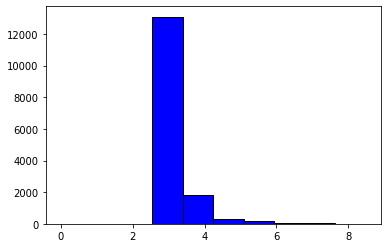

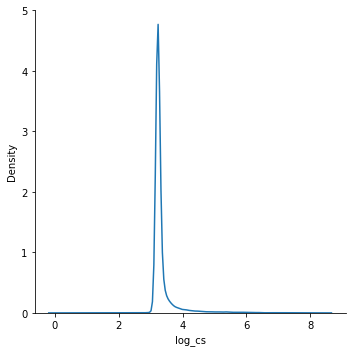

In [26]:
# /r/AskWomen logarithm comment score histogram and density plots
plt.hist(women['log_cs'], color = 'blue', edgecolor = 'black', bins = 10);
sns.displot(data = women, x = 'log_cs', kind = 'kde');

We can see a little better the distribution of the comment_score variable that 

# Z-scoring 'comment_score' numerical variable

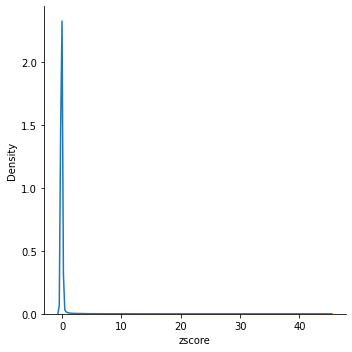

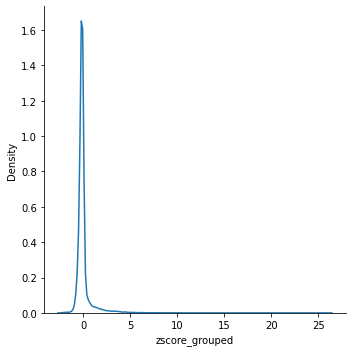

In [27]:
# Men
# Ungrouped
men2['zscore'] = zscore(men2['comment_score'], ddof = 0)

# Grouped by submission title
zscore_men_grouped = men2.groupby(['submission_title']).comment_score.transform(lambda x : zscore(x , ddof = 0))
men2['zscore_grouped'] = zscore_men_grouped # adding zscored comment_score to

sns.displot(data = men2.zscore, kind = 'kde');
sns.displot(data = men2.zscore_grouped, kind = 'kde');

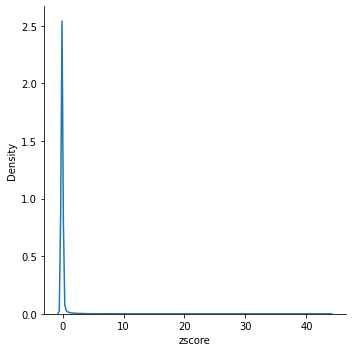

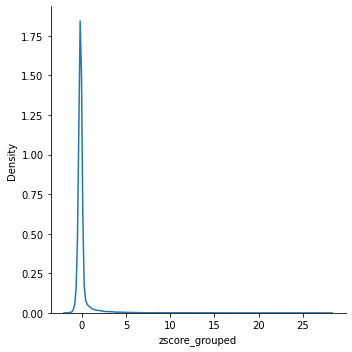

In [28]:
# Women
# Ungrouped
women2['zscore'] = zscore(women2['comment_score'], ddof = 0)

# Grouped by submission title
zscore_women_grouped = women2.groupby(['submission_title']).comment_score.transform(lambda x : zscore(x , ddof = 0))
women2['zscore_grouped'] = zscore_women_grouped # adding zscored comment_score to

sns.displot(data = women2.zscore, kind = 'kde');
sns.displot(data = women2.zscore_grouped, kind = 'kde');

# MINMAX scaling of variable 'comment_score'

It might prove useful to have comment_score variable rescaled to the values between -1 to 1 in the next step of anylizing this data set thus according rescaled variables are created below for men and women datasets. It will be rescaled according to the min-max normalization. 

$$x' = \frac{x - min(x)}{max(x) - min(x)}$$

To rescale a values between arbitraty set of values $[a,b]$ we use the following formula:

$$x' = a + \frac{(x - min(x))(b - a)}{max(x) - min(x)}$$


In [29]:
men2.comment_score.min()
men2.comment_score.max()


-32

8059

In [30]:
# Men
# Ungrouped data
nominator_men = men2.comment_score - men2.comment_score.min()
denominator_men = men2.comment_score.max() - men2.comment_score.min()
# minmax_men = nominator_men / denominator_men # for [0,1] interval
minmax_men = -1 +  nominator_men * (1 - (-1)) / denominator_men

minmax_men
minmax_men.min()
minmax_men.max()

# Grouped data by submission title
min_grouped = men2.groupby(['submission_title']).comment_score.transform('min')
max_grouped = men2.groupby(['submission_title']).comment_score.transform('max')
nominator_men = men2.comment_score - min_grouped
denominator_men = max_grouped - min_grouped
# minmax_men_grouped = nominator_men / denominator_men # for [0,1] interval
minmax_men_grouped = -1 +  nominator_men * (1 - (-1)) / denominator_men

minmax_men_grouped
minmax_men_grouped.min()
minmax_men_grouped.max()

men2['minmax'] = minmax_men
men2['minmax_grouped'] = minmax_men_grouped

0       -0.759239
1        0.039179
2        0.077246
3       -0.528365
4       -0.803238
           ...   
17275   -0.991348
17276   -0.991348
17277   -0.991348
17278   -0.989865
17279   -0.991843
Name: comment_score, Length: 17071, dtype: float64

-1.0

1.0

0       -0.560886
1        0.928967
2        1.000000
3       -0.130074
4       -0.642989
           ...   
17275   -0.666667
17276   -0.666667
17277   -0.666667
17278    0.333333
17279   -1.000000
Name: comment_score, Length: 17071, dtype: float64

-1.0

1.0

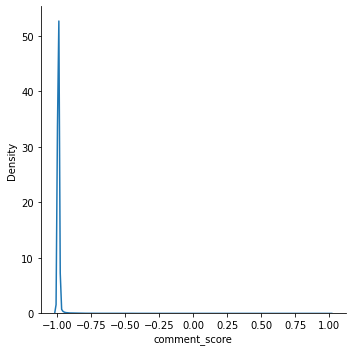

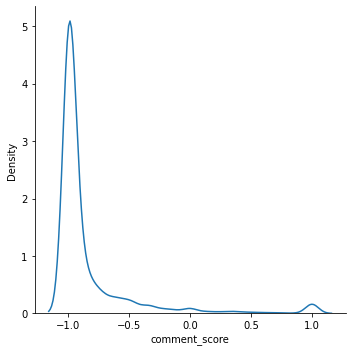

In [31]:
sns.displot(data = minmax_men, kind = 'kde');
sns.displot(data = minmax_men_grouped, kind = 'kde')

In [32]:
# Women
# Ungrouped data
nominator_women = women2.comment_score - women2.comment_score.min()
denominator_women = women2.comment_score.max() - women2.comment_score.min()
# minmax_women = nominator_women / denominator_women # for [0,1] interval
minmax_women = -1 +  nominator_women * (1 - (-1)) / denominator_women

minmax_women
minmax_women.min()
minmax_women.max()

# Grouped data by submission title
min_grouped = women2.groupby(['submission_title']).comment_score.transform('min')
max_grouped = women2.groupby(['submission_title']).comment_score.transform('max')
nominator_women = women2.comment_score - min_grouped
denominator_women = max_grouped - min_grouped
# minmax_women_grouped = nominator_women / denominator_women # for [0,1] interval
minmax_women_grouped = -1 +  nominator_women * (1 - (-1)) / denominator_women

minmax_women_grouped
minmax_women_grouped.min()
minmax_women_grouped.max()

women2['minmax'] = minmax_women
women2['minmax_grouped'] = minmax_women_grouped

0       -0.978666
1       -0.983685
2       -0.984104
3       -0.984940
4       -0.985359
           ...   
16844   -0.989960
16849   -0.989960
16850   -0.989960
16852   -0.989960
16854   -0.989960
Name: comment_score, Length: 15444, dtype: float64

-1.0

1.0

0        1.000000
1        0.142857
2        0.071429
3       -0.071429
4       -0.142857
           ...   
16844   -0.995696
16849   -0.995696
16850   -0.995696
16852   -0.995696
16854   -0.995696
Name: comment_score, Length: 15444, dtype: float64

-1.0

1.0

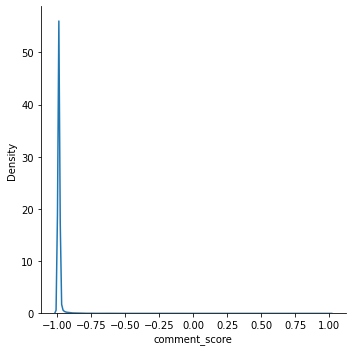

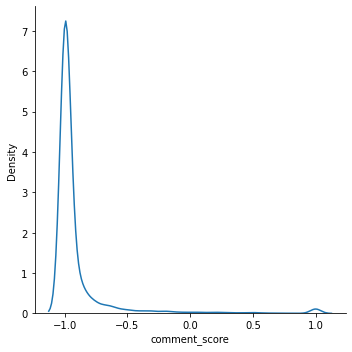

In [33]:
sns.displot(data = minmax_women, kind = 'kde');
sns.displot(data = minmax_women_grouped, kind = 'kde')

# Adding scaled variables

In [34]:
men2.head()

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,comment_score,submission_title,submission_ups,zscore,zscore_grouped,minmax,minmax_grouped
0,virusamongus,"Oh no, I was so interested in the nuanced deba...",oh no i was so interested in the nuanced debat...,oh interested nuanced debate regarding guys en...,"[oh, no, i, was, so, interested, in, the, nuan...",oh interest nuanc debat regard guy enjoy frequ...,"[oh, interested, nuanced, debate, regarding, g...",942,BONK! Overly sexual questions are no longer al...,13949,5.180058,2.787272,-0.759239,-0.560886
1,CoffeeEnjoyerFrog,"Can't wait to see : men, what gets you at 25% ...",cant wait to see men what gets you at erection,cant wait see men gets erection,"[cant, wait, to, see, men, what, gets, you, at...",cant wait see men get erect,"[cant, wait, see, men, gets, erection]",4172,BONK! Overly sexual questions are no longer al...,13949,23.281242,12.807606,0.039179,0.928967
2,5altyShoe,Looks like someone got some post ~~nut~~ legum...,looks like someone got some post nut legume cl...,looks like someone got post nut legume clarity,"[looks, like, someone, got, some, post, nut, l...",look like someon got post nut legum clariti,"[looks, like, someone, got, post, nut, legume,...",4326,BONK! Overly sexual questions are no longer al...,13949,24.144271,13.285356,0.077246,1.000000
3,mightyjake,> remember to read the Bible\n\nEzekiel 23:20\...,remember to read the bible ezekiel there she l...,remember read bible ezekiel lusted lovers whos...,"[remember, to, read, the, bible, ezekiel, ther...",rememb read bibl ezekiel lust lover whose geni...,"[remember, read, bible, ezekiel, lusted, lover...",1876,BONK! Overly sexual questions are no longer al...,13949,10.414270,5.684793,-0.528365,-0.130074
4,TallCombination6,How am I supposed to know that men enjoy blowj...,how am i supposed to know that men enjoy blowj...,supposed know men enjoy blowjobs someone doesn...,"[how, am, i, supposed, to, know, that, men, en...",suppos know men enjoy blowjob someon doesnt as...,"[supposed, know, men, enjoy, blowjobs, someone...",764,BONK! Overly sexual questions are no longer al...,13949,4.182531,2.235068,-0.803238,-0.642989


In [35]:
women2.head()

,username,com_original,cleaned,cleaned_wo_sw,tokenized,stemmed,tokenized_wo_sw,comment_score,submission_title,submission_ups,zscore,zscore_grouped,minmax,minmax_grouped
0,shockedpikachu123,Waiting for the cvs candy to be 75% off on Feb...,waiting for the cvs candy to be off on february,waiting cvs candy february,"[waiting, for, the, cvs, candy, to, be, off, o...",wait cv candi februari,"[waiting, cvs, candy, february]",28,Valentines Day Mega thread! Check in here for ...,100,0.133584,4.708519,-0.978666,1.000000
1,secrethedgehog5,"My second valentines day alone, and i am feeli...",my second valentines day alone and i am feelin...,second valentines day alone feeling bit meh okay,"[my, second, valentines, day, alone, and, i, a...",second valentin day alon feel bit meh okay,"[second, valentines, day, alone, feeling, bit,...",16,Valentines Day Mega thread! Check in here for ...,100,0.022916,2.228797,-0.983685,0.142857
2,KBXGazelle,February 14 was my mom's birthday so I usually...,february was my moms birthday so i usually spe...,february moms birthday usually spend day reall...,"[february, was, my, moms, birthday, so, i, usu...",februari mom birthday usual spend day realli e...,"[february, moms, birthday, usually, spend, day...",15,Valentines Day Mega thread! Check in here for ...,100,0.013693,2.022154,-0.984104,0.071429
3,meloaf,I'm sending all my friends Valentine's Day car...,im sending all my friends valentines day cards...,im sending friends valentines day cards snail ...,"[im, sending, all, my, friends, valentines, da...",im send friend valentin day card snail mail wa...,"[im, sending, friends, valentines, day, cards,...",13,Valentines Day Mega thread! Check in here for ...,100,-0.004752,1.608867,-0.984940,-0.071429
4,OriginalOestrus,I have reservations at my favorite steakhouse!...,i have reservations at my favorite steakhouse ...,reservations favorite steakhouse last year wor...,"[i, have, reservations, at, my, favorite, stea...",reserv favorit steakhous last year wore nice j...,"[reservations, favorite, steakhouse, last, yea...",12,Valentines Day Mega thread! Check in here for ...,100,-0.013974,1.402224,-0.985359,-0.142857


# Saving final datasets

In [36]:
men2.to_csv('./data/final_askmen.csv', sep = ';', encoding = "utf-8", index = None, header = True)
women2.to_csv('./data/final_askwomen.csv', sep = ';', encoding = "utf-8", index = None, header = True)